# ESERCIZIO 1

## PUNTO 1
Sia X una variabile aleatoria di Poisson, e sia λ il numero medio di eventi che accadono in un intervallo di ampiezza prefissata.

1) Quanti valori può assumere X?
  - Tutti i valori di N compreso lo zero
  - Funzione FMDP della VA poissoniana
  - E(X)= λ
  - Var(X)= λ

### PUNTO 2

Fissiamo  λ = 5 e definiamo:

1) il grafico di FMDP

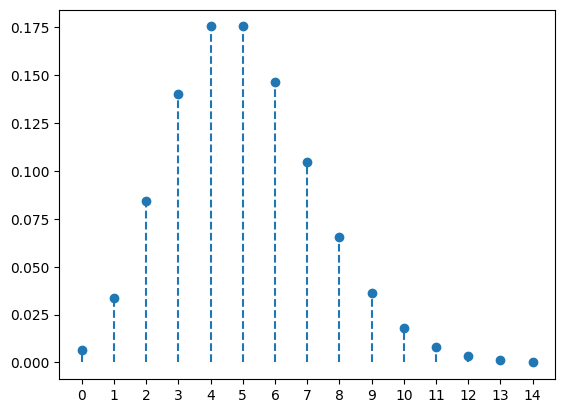

In [79]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import statistics as stat
import statsmodels.api as sm

p = sp.poisson(5)
x = np.arange(0, 14+ 1, 1)
plt.xticks(x)
plt.vlines(x,0,p.pmf(x),linestyle='dashed')
plt.plot(x, p.pmf(x), 'o')
plt.show()

2) probabilita' che X sia maggiore di 6.

In [3]:
import math as m
def PFR(l,x):
    res=0.0
    for i in range (x+1):
        res+=((m.pow(l,i)*m.pow((m.e),(-1*l)))/(m.factorial(i)))
    return res

1-PFR(5,6)

0.23781653702706118

3. Trovare X minima tale che PFR(l,X) sia >= 0.8

In [4]:
l=5
x=0
while PFR(l,x)<0.8:
    x+=1
print(x)

7


## PUNTO 3

Avendo la Variabile Aleatoria X e avendo la variabile aleatoria Y = aX + B ho una trasformazione affine.
il valore atteso con le trasformazioni equivale al valore atteso trasformato coerentemente con la trasformazione.
la varianza equivale al valore di a^2 * Var(X). Quindi:

- E(X) = Lambda * A + B
- Var(X) = A^2*Lambda

# ESERCIZIO 2

Un'azienda è proprietaria di alcune sorgenti di alta montagna. L'azienda ha da poco acquistato un dispositivo per il filtraggio dell'acqua, che filtra 5 litri di acqua per volta e, per ogni operazione, registra su un file alcune informazioni tra cui il nome della sorgente dalla quale è stata prelevata l'acqua, la durezza dell'acqua analizzata, il numero di particelle riscontrate di alcuni elementi (per esempio magnesio, sodio, oro, argento, ferro, piombo, iodio). Dalle prime prove di utilizzo si è notato con sorpresa che, nel file prodotto dal dispositivo, la colonna corrispondente all'oro non contiene sempre il valore zero, quindi nell'acqua si possono trovare tracce di oro.

In [5]:
import pandas as pd
df = pd.read_csv('./ComposizioneAcqua.csv',sep=',')
df

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


### Domanda 1
Quanti casi sono presenti nel file?

In [6]:
len(df)

1650

### Domanda 2
Quanti litri sono stati analizzati?

In [7]:
len(df['Oro'])*5

8250

### Domanda 3
Quante sono le sorgenti dalle quali sono stati prelevati i campioni di acqua?

In [8]:
#Con i SET
len(set(df['NomeSorgente']))

#Con Unique
len(df['NomeSorgente'].unique())

5

### Domanda 4
Le diverse sorgenti sono rappresentate in modo uniforme nel dataset?

In [9]:
import math
from scipy.stats import entropy

def gini(series):
    return 1-sum(series.value_counts(normalize=True).map(lambda f: math.pow(f,2)))

def my_entropy(series):
    return 0-sum(series.value_counts(normalize=True).map(lambda f: f*math.log(f,math.e)))

def normalized_entropy(series):
    leng=len(series.value_counts(normalize=True))
    return my_entropy(series)*1/leng

def normalized_gini(series):
    leng=len(series.value_counts(normalize=True))
    return gini(series)*leng/(leng-1)
 
print("Normalized GINI: ",normalized_gini(df['NomeSorgente']))
print("Normalized ENTROPY: ",normalized_entropy(df['NomeSorgente']))

Normalized GINI:  0.980257116620753
Normalized ENTROPY:  0.3145005552445871


### Domanda 5 - 6
Si calcoli la tabella delle frequenze delle particelle di oro su 5 litri di acqua.
_Si tracci un grafico opportuno per la visualizzazione di tali frequenze._

In [10]:
ct_oro_rel = pd.crosstab(index=df['Oro'],columns=['FR'],colnames=[''],normalize=True)
ct_oro_abs = pd.crosstab(index=df['Oro'],columns=['FR'],colnames=[''],normalize=False)
ct_oro_rel

,FR
Oro,
0,0.276364
1,0.296364
2,0.198788
3,0.086667
4,0.048485
5,0.038182
6,0.029091
7,0.012121
8,0.007273


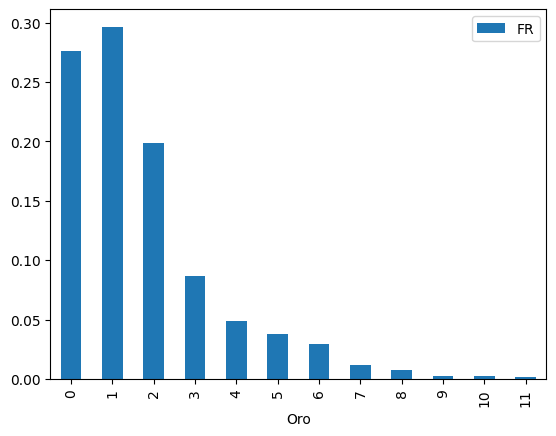

In [11]:
ct_oro_rel.plot.bar()
plt.show()

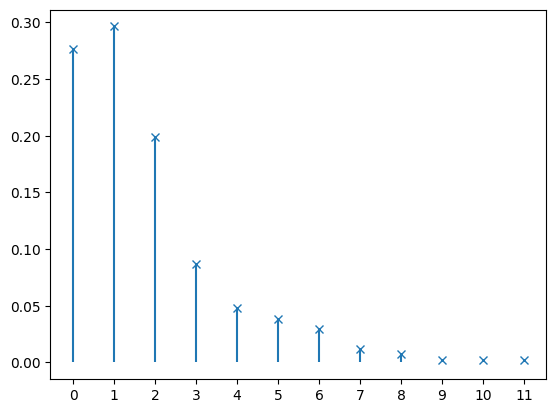

In [12]:
x = np.arange(0, max(ct_oro_rel.index) + 1, 1)
plt.vlines(ct_oro_rel.index,0,ct_oro_rel.values)
plt.plot(ct_oro_rel.index,ct_oro_rel.values,'x')
plt.xticks(x)
plt.show()

### Domanda 7
_La distribuzione delle frequenze osservata è compatibile con un modello di Poisson?_

In [13]:
df['Oro'].mean()

1.7224242424242424

In [14]:
df['Oro'].var()

3.4025896319164968

Nel modello di Poisson abbiamo che Valore atteso e varianza sono uguali.  Nonostante il grafico ricordi una distribuzione di Poisson, il fatto che questi due dati siano diversi sono un indicatore che probabilmente non si tratta di tale distribuzione.

### Domanda 8
_Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua._

Considerando che E(X) = media ponderata delle frequenze. Possiamo definire che il valore atteso in questo caso è uguale a 1.72. Nel caso fossimo davanti ad una poissoniana questo valore corrisponderebbe anche al parametro lambda.

# Esercizio 3

### Domanda 1

Si tracci un grafico opportuno per visualizzare la distribuzione della durezza dell'acqua.

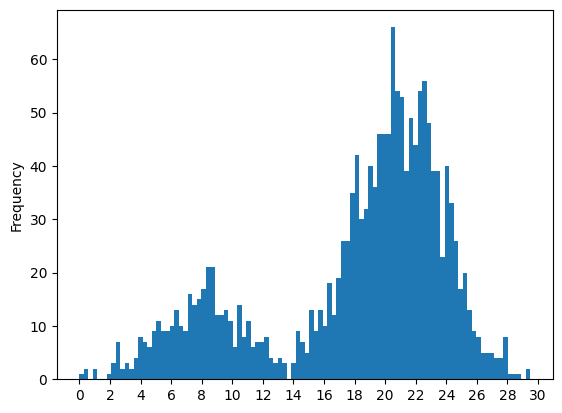

In [46]:
ct_acqua = pd.crosstab(index=df['DurezzaAcqua'],columns='FA',colnames=[''],normalize=False)
durezza=df['DurezzaAcqua']
durezza.plot.hist(bins=100)
plt.xticks(np.arange(0, max(durezza) + 2, 2))
plt.show()

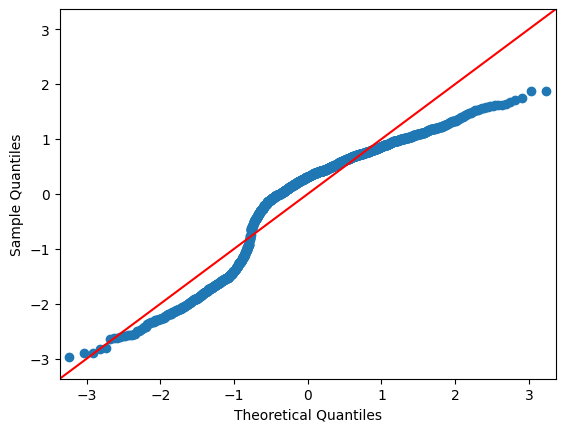

In [82]:
sm.qqplot(durezza, fit=True, line='45')
plt.show()

### Domanda 2

In [60]:
durezza.mean()

18.083984117529504

In [49]:
durezza.median()

19.992062251968825

In [53]:
stat.mode(durezza)

21.20138141309851

Moda media e mediana in un modello normale devono essere uguali. Nonostante la media e la mediana siano vicini di valori, non sono uguali e il fatto che la moda sia completamente diversa e che il grafico non abbia una simmetria a campana ci conferma che non ci troviamo di fronte ad un modello normale

### Domanda 3
L'ufficio analisi chimiche ipotizza che ci sia una relazione tra la quantità di oro riscontrata e la durezza dell'acqua. Si produca un grafico e si calcoli un indice numerico per convincere il titolare della ditta che l'ipotesi è accettabile.

In [72]:
durezza=df['DurezzaAcqua']
oro=df['Oro']
durezza.corr(oro)

-0.8427686305078543

I due dati hanno una correlazione negativa. Se li plottiamo su uno scatter plot:

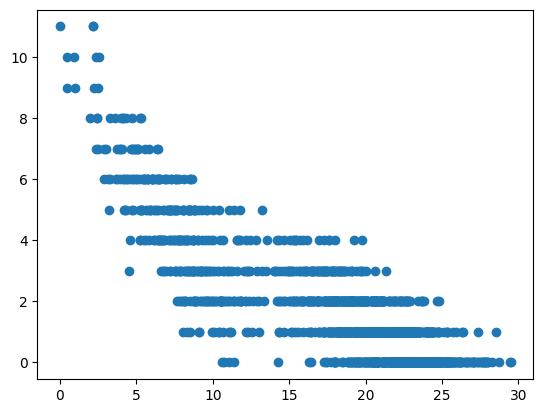

In [78]:
plt.scatter(durezza,oro)
plt.show()

### Domanda 4
Che tipo di relazione avete riscontrato?

Ho riscontrato una correlazione fortemente negativa

### Domanda 5
Osservando i grafici prodotti nei primi due punti di questo esercizio, ai chimici viene il sospetto che non tutte le sorgenti siano caratterizzate dalla stessa durezza media dell'acqua, e in particolare che nel dataset ci siano due gruppi distinti dal punto di vista della durezza dell'acqua. Si valuti se questa ipotesi è condivisibile.

I due grafici definiti precedentemente evidenziano che vi sono due sezioni di campane distinte con termine della prima al valore 14.
I picchi delle due campane sono diversi come si può osservare.

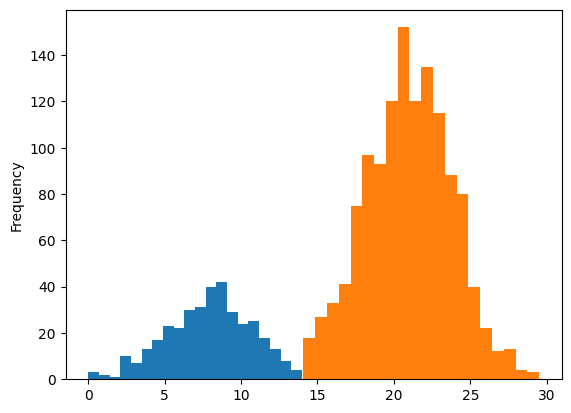

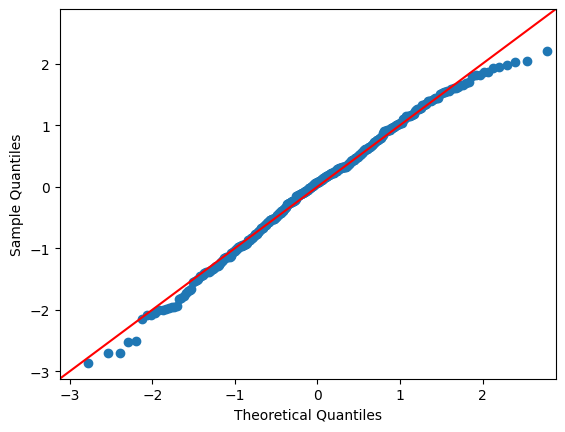

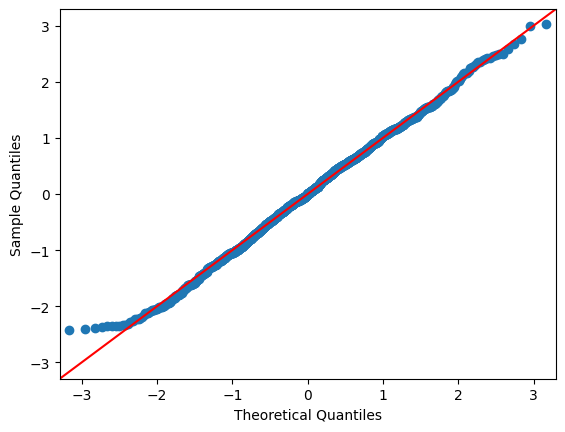

In [115]:
durezza_low=durezza[durezza<14]
durezza_high=durezza[durezza>=14]

durezza_low.plot.hist(bins=20)
durezza_high.plot.hist(bins=20)
sm.qqplot(durezza_low, fit=True, line='45')
sm.qqplot(durezza_high, fit=True, line='45')

plt.show()

### Domanda 6
Si calcoli la durezza media dell'acqua per ogni sorgente rappresentata nel dataset.

In [117]:
media_durezza = df.groupby('NomeSorgente')['DurezzaAcqua'].mean().reset_index()
media_durezza

,NomeSorgente,DurezzaAcqua
0,Sorgente1,21.009675
1,Sorgente2,20.836725
2,Sorgente3,20.696062
3,Sorgente4,20.917371
4,Sorgente5,7.754144


### Domanda 7
Dal punto precedente dovrebbe essere emerso che la sorgente 5 presenta una durezza dell'acqua nettamente inferiore a quella delle altre sorgenti, le quali invece hanno una durezza media abbastanza simile. Selezionate e memorizzate nella variabile sorgente_5 gli attributi Oro e DurezzaAcqua soltanto della sorgente 5; selezionate e memorizzate nella variabile altre_sorgenti i medesimi attributi per tutte le altre sorgenti.

In [134]:
sorgente_5 = df[df['NomeSorgente']=="Sorgente5"]
altre_sorgenti = df[df['NomeSorgente']!="Sorgente5"]
altre_sorgenti

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1295,Sorgente4,2,16.587424
1296,Sorgente4,0,22.519519
1297,Sorgente4,4,15.428171
1298,Sorgente4,0,27.437145


### Domanda 8
Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua:
- nel caso della sorgente 5;
- per tutte le altre sorgenti.

In [135]:
sorgente_5['Oro'].mean()

4.228571428571429

In [136]:
altre_sorgenti['Oro'].mean()

1.0476923076923077

### Domanda 9
La distribuzione delle frequenze osservate per la sorgente 5 è compatibile con un modello di Poisson?

In [137]:
print(sorgente_5['Oro'].mean())
print(sorgente_5['Oro'].var())

4.228571428571429
4.38886614817847


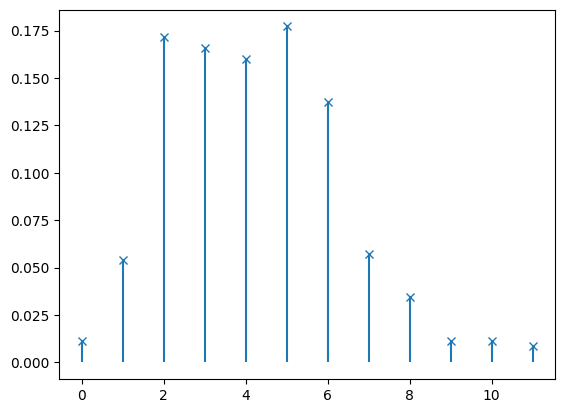

In [170]:
frs5=sorgente_5['Oro'].value_counts(normalize=True)
plt.vlines(frs5.index, [0]*len(frs5), frs5.values)
plt.plot(frs5.index, frs5.values, 'x')
plt.show()

<BarContainer object of 12 artists>

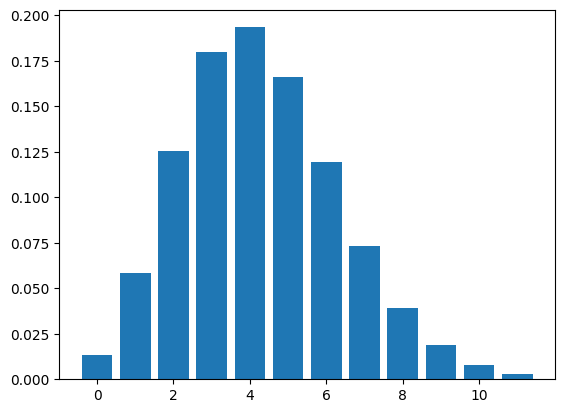

In [158]:
p=sp.poisson(4.3)
x = np.arange(0, max(sorgente_5['Oro']) + 1, 1)
plt.bar(x,p.pmf(x))

### Domanda 10
La distribuzione delle frequenze osservate per le altre sorgenti è compatibile con un modello di Poisson?

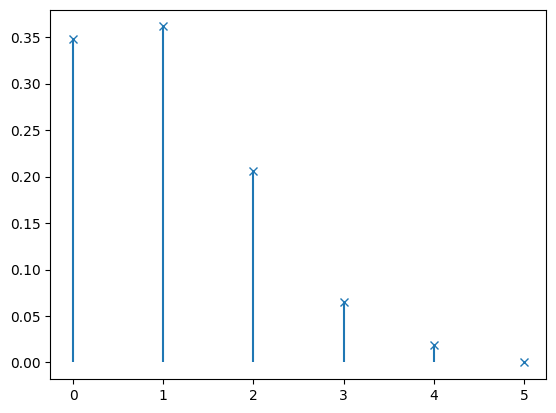

In [171]:
frsa=altre_sorgenti['Oro'].value_counts(normalize=True)
plt.vlines(frsa.index, [0]*len(frsa), frsa.values)
plt.plot(frsa.index, frsa.values, 'x')
plt.show()

In [176]:
altre_sorgenti['Oro'].mean()

1.0476923076923077

In [177]:
altre_sorgenti['Oro'].var()

0.9923349321963642

Si, seguono il modello di Poisson pure loro